In [1]:
# importing the libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

## Normal Distribution

In [2]:
# Let us sample a data from a normal distribution with our chosen mean and std:
mean = 40
std = 10
X = np.random.normal(mean, std, 1000)

(array([  9.,  19.,  87., 211., 270., 257., 110.,  29.,   7.,   1.]),
 array([ 4.80810836, 12.28972758, 19.7713468 , 27.25296602, 34.73458524,
        42.21620446, 49.69782369, 57.17944291, 64.66106213, 72.14268135,
        79.62430057]),
 <BarContainer object of 10 artists>)

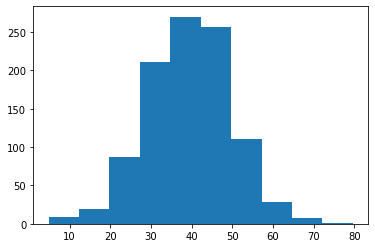

In [5]:
# We can see that the data X us normally distributed around the mean 40
plt.hist(X)

Now, let us suppose we were given the data and we didn't know the real parameters i.e. the real mean $\mu$ and the real standard deviation $\sigma$
We want to approximate the parameters so we name them $\hat{\mu}$ and $\hat{\sigma}$. 
The formula for $\hat{\mu}$ is: $$\hat{\mu} = \sum_{i=1}^{n}\frac{x_{i}}{n} $$
The formua for $\hat{\sigma}$ is: $$ \hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\mu)^{2}} $$

NOTE: See the subtopic "Continuous distribution, continuous parameter space" here: https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,observed%20data%20is%20most%20probable.

In [6]:
def normal_mu_MLE(X):
    # Get the number  of observations:
    n = len(X)
    # Sum of the observations:
    s = sum(X)
    # Calculate the estimated mean:
    return sum(X)/n

def normal_sigma_MLE(X):
    n = len(X)
    # Get the mu MLE:
    mu = normal_mu_MLE(X)
    # Sum the squares of the differences:
    s = sum((X-mu)**2)
    # compute the estimated standard deviation:
    return np.sqrt((1.0/n)*(s))

Now let's try our functions out on our sample data and see how they compare to the built-in np.mean and np.std



In [9]:
print(f"Our estimated mean: {normal_mu_MLE(X)}")
print(f"Inbuilt estimated mean: {np.mean(X)}")

print(f"\nOur estimated standard deviation: {normal_sigma_MLE(X)}")
print(f"Inbuilt estimated standard deviation: {np.std(X)}")

Our estimated mean: 39.41633991455696
Inbuilt estimated mean: 39.41633991455696

Our estimated standard deviation: 10.285737119041393
Inbuilt estimated standard deviation: 10.28573711904139


In [12]:
# Now let us estimate using Scipy's fit function:
mu, std = scipy.stats.norm.fit(X)
print(f"Estimated Mean: {mu}")
print(f"Estimated Standard Deviation: {std}")

Estimated Mean: 39.41633991455696
Estimated Standard Deviation: 10.28573711904139


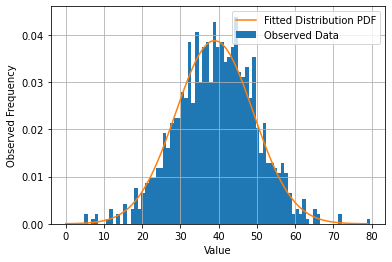

In [16]:
# Now let us fit the data:
pdf = scipy.stats.norm.pdf
x = np.linspace(0,80,80)
plt.hist(X, bins=80, density=True)
plt.plot(pdf(x, loc=mu, scale=std))
plt.xlabel("Value")
plt.ylabel("Observed Frequency")
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);
plt.grid()
plt.plot();

## Exponential Distribution

The exponential distribution is defined as following:
$$
f_{X}(x) = \frac{1}{\lambda}e^{-\frac{x}{\lambda}}
$$ 
Then, the likelihood function for exponential distribution becomes:
$$\begin{aligned}
L(\lambda;x_{1},\dotsc ,x_{n}) = \prod_{i=1}^{n}\frac{1}{\lambda}e^{-\frac{x_{i}}{\lambda}} \\
=\lambda^{-n}e^{-\frac{1}{\lambda}\sum_{i=1}^{n}x_{i}} \\
=\lambda^{-n}e^{-\lambda^{-1}\sum_{i=1}^{n}x_{i}} \\
\end{aligned}$$

Now that we have the likelihood function, we take the lof to get the log-likelihood function:
$$\begin{aligned}
l(\lambda;x_{1},\dotsc ,x_{n}) = \ln{L(\lambda;x_{1},\dotsc ,x_{n})} \\
=  \ln(\lambda^{-n}) + \ln(e^{-\lambda^{-1}\sum_{i=1}^{n}x_{i}}) \\
= -n\ln(\lambda) -\lambda^{-1}\sum_{i=1}^{n}x_{i}
= -n\ln(\lambda) - \frac{1}{\lambda}\sum_{i=1}^{n}x_{i}
\end{aligned}$$

So, finally we have:
$$
l = -n\ln(\lambda) - \frac{1}{\lambda}\sum_{i=1}^{n}x_{i}
$$

Now we want the maximum likelihood estimator and that means to maximize $l$ over $lambda$. This means  $\frac{\partial l}{\partial \lambda} = 0$ and hence we get the following:
$$\begin{aligned}
\frac{\partial l}{\partial \lambda} = -\frac{n}{\lambda} + \frac{1}{\lambda^{2}}\sum_{i=1}^{n}x_{i}  = 0
\end{aligned}$$

Thid means:
$$
\frac{n}{\lambda} = \frac{1}{\lambda^{2}}\sum_{i=1}^{n}x_{i}
$$

And finally we get:
$$
\hat{\lambda} = \frac{1}{n}\sum_{i=1}^{n}x_{i}
$$


In [33]:
# let us generate the data:
lambda_real = 5
X = np.random.exponential(lambda_real, 1000)

In [34]:
# Our function to the estimate:
def exp_lambda_MLE(X):
    n = len(X)
    s = sum(X)
    return s/n

# Scipy inbuilt function:
_,l=scipy.stats.expon.fit(X, floc=0)

In [35]:
print(f"Our estimate of lambda: {exp_lambda_MLE(X)}")
print(f"Scipy's estimate of lambda: {l}")

Our estimate of lambda: 4.870571041375802
Scipy's estimate of lambda: 4.870571041375804


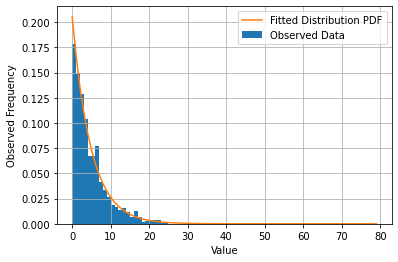

In [36]:
# now we graph it:
pdf = scipy.stats.expon.pdf
x = range(0, 80)
plt.hist(X, bins=x, density='true')
plt.plot(pdf(x, scale=l))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.grid()
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

## MLE for Asset Returns

Now we'll fetch some real returns and try to fit a normal distribution to them using MLE.



In [37]:
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2014,1,1)
end = dt.datetime(2015,1,1)

prices =  web.DataReader('TSLA', "yahoo", start, end)['Adj Close']

In [49]:
# Now, we calculate absolute returns each day i.e. today's price-last-day's price:
absolute_returns = np.diff(prices)
returns = absolute_returns/prices[:-1] # This is the same as prices.pct_change()[1:]

Let's use scipy's fit function to get the $\mu$ and $\sigma$ MLEs.



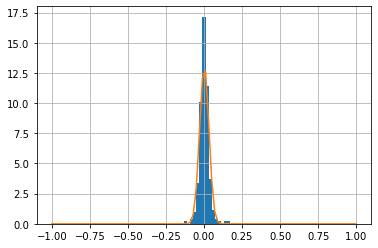

In [54]:
mu, std = scipy.stats.norm.fit(returns)
pdf = scipy.stats.norm.pdf
x = np.linspace(-1,1, num=100)
h = plt.hist(returns, bins=x, density=True)
l = plt.plot(x, pdf(x, loc=mu, scale=std))
plt.grid();

Of course, this fit is meaningless unless we've tested that they obey a normal distribution first. We can test this using the Jarque-Bera normality test. The Jarque-Bera test will reject the hypothesis of a normal distribution if the p-value is under a c.

In [60]:
from statsmodels.stats.stattools import jarque_bera
result = jarque_bera(returns)
print(f"Jarque-Bera Test statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Skewness: {result[2]}")
print(f"Kurtosis: {result[3]}")

Jarque-Bera Test statistic: 249.43350770703043
p-value: 6.858071372376853e-55
Skewness: 0.7513125049011787
Kurtosis: 7.646755207269467


In [61]:
# The above figures are parameters for our "returns" 
# Let us look at parameters of a standard normal distribution
result_actual = jarque_bera(np.random.normal(0,1,1000))
print(f"Jarque-Bera Test statistic: {result_actual[0]}")
print(f"p-value: {result_actual[1]}")
print(f"Skewness: {result_actual[2]}")
print(f"Kurtosis: {result_actual[3]}")

Jarque-Bera Test statistic: 0.30908607254147064
p-value: 0.8568066175870686
Skewness: 0.024903006064173238
Kurtosis: 2.929733173567705
